In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from abroca import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Recidivism - https://catalog.data.gov/dataset/recidivism-beginning-2008
df = pd.read_csv('abroca_try.csv')
df.head(5)

,Release Year,County of Indictment,Gender,Age at Release,Return Status
0,2008,UNKNOWN,MALE,55,Not Returned
1,2008,ALBANY,MALE,16,Returned Parole Violation
2,2008,ALBANY,MALE,17,Not Returned
3,2008,ALBANY,MALE,17,Returned Parole Violation
4,2008,ALBANY,MALE,18,Not Returned


In [3]:
#create target label 
df['returned'] = np.where(df['Return Status'] != "Not Returned",1,0)

In [4]:
#label encode
le = preprocessing.LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [5]:
#Splitting data into train and test
X = df.iloc[:,0:4]
y = df.iloc[:,5:6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
#fit simple classifier
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [7]:
#make predictions
X_test['pred_proba'] = lr.predict_proba(X_test)[:,:1]
X_test['returned'] = y_test
df_test = X_test

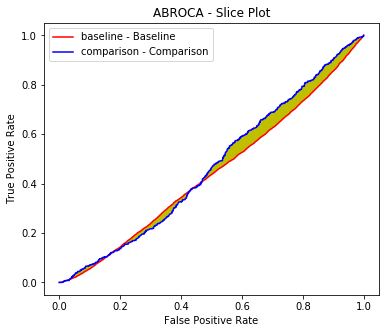

0.03244233855000829

In [8]:
#Compute Abroca
slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'returned', protected_attr_col = 'Gender',
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, file_name = 'slice_plot.png')
slice